<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/tables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install requirements

In [1]:
!pip install sklearn pandas
!pip install prettytable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=9992190148c422af3a4cc0e45f3c9dffc2044a5a862519ade61ba8455f9aeb0c
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Read dataset

In [2]:
import pandas as pd
from google.colab import drive 
drive = drive.mount('/content/drive') 

Mounted at /content/drive


Call algorithms from sklearntrain_featurestrain_fea

In [95]:
project = 'oryx'

df = pd.read_csv(f"drive/MyDrive/subtract/{project}/class.csv")

In [96]:
df

,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
0,ba899dd5f05492b8c6e3e410d6a833c63392bf63,com.cloudera.oryx.lambda.serving.SecureAPIConf...,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27e9046b2bd92243c260efd8bcd0af46b92bdf9e,com.cloudera.oryx.app.serving.kmeans.Console,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27e9046b2bd92243c260efd8bcd0af46b92bdf9e,com.cloudera.oryx.app.serving.rdf.Console,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27e9046b2bd92243c260efd8bcd0af46b92bdf9e,com.cloudera.oryx.app.serving.als.Console,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,d16f89b25fc5e12f94af6432274c66e0394c1743,com.cloudera.oryx.app.serving.rdf.Console,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,31fb3c41d9d4b4650dd5da05b2212c7d27cb1da9,com.cloudera.oryx.app.mllib.rdf.RDFCategorical...,0.685644,4,4,4,0.620253,0.625,49,40,...,0,0,0,0,0,0,1,0,0,1
594,8de37c9b69a6688bc4af8f1d3601161a942aff58,com.cloudera.oryx.lambda.HadoopUtilsTest,0.904762,1,1,1,0.714286,0.800,10,8,...,0,0,0,0,0,0,0,0,0,0
595,8de37c9b69a6688bc4af8f1d3601161a942aff58,com.cloudera.oryx.lambda.HadoopUtilsTest$1,1.000000,1,1,1,1.000000,1.000,6,5,...,0,0,0,0,0,0,0,0,0,0
596,fddb336ac30ea3fb0bde91c61ef043f523d7d9fe,com.cloudera.oryx.lambda.serving.ModelManagerL...,1.000000,1,1,1,1.000000,1.000,6,6,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df.head(3)

,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
0,ba899dd5f05492b8c6e3e410d6a833c63392bf63,com.cloudera.oryx.lambda.serving.SecureAPIConf...,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27e9046b2bd92243c260efd8bcd0af46b92bdf9e,com.cloudera.oryx.app.serving.kmeans.Console,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27e9046b2bd92243c260efd8bcd0af46b92bdf9e,com.cloudera.oryx.app.serving.rdf.Console,0.0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df.tail(4)

,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
594,8de37c9b69a6688bc4af8f1d3601161a942aff58,com.cloudera.oryx.lambda.HadoopUtilsTest,0.904762,1,1,1,0.714286,0.8,10,8,...,0,0,0,0,0,0,0,0,0,0
595,8de37c9b69a6688bc4af8f1d3601161a942aff58,com.cloudera.oryx.lambda.HadoopUtilsTest$1,1.000000,1,1,1,1.000000,1.0,6,5,...,0,0,0,0,0,0,0,0,0,0
596,fddb336ac30ea3fb0bde91c61ef043f523d7d9fe,com.cloudera.oryx.lambda.serving.ModelManagerL...,1.000000,1,1,1,1.000000,1.0,6,6,...,0,0,0,0,0,0,0,0,0,0
597,fddb336ac30ea3fb0bde91c61ef043f523d7d9fe,com.cloudera.oryx.lambda.speed.SpeedLayer$2,1.000000,1,1,1,1.000000,1.0,6,6,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 98 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hash                               598 non-null    object 
 1   LongName                           598 non-null    object 
 2   CC                                 598 non-null    float64
 3   CCL                                598 non-null    int64  
 4   CCO                                598 non-null    int64  
 5   CI                                 598 non-null    int64  
 6   CLC                                598 non-null    float64
 7   CLLC                               598 non-null    float64
 8   LDC                                598 non-null    int64  
 9   LLDC                               598 non-null    int64  
 10  LCOM5                              598 non-null    int64  
 11  NL                                 598 non-null    int64  

In [100]:
df.describe(include="all")

,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
count,598,598,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,...,598.0,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.0,598.000000
unique,87,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,d16f89b25fc5e12f94af6432274c66e0394c1743,com.cloudera.oryx.lambda.AbstractSparkLayer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,45,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.083616,0.411371,0.963211,0.444816,0.076221,0.078048,7.473244,6.297659,...,0.0,0.769231,0.025084,0.041806,0.023411,0.108696,0.237458,0.307692,0.0,0.096990
std,NaN,NaN,0.175586,1.001509,2.711472,1.057540,0.160963,0.164450,19.164153,16.302573,...,0.0,1.448244,0.156510,0.283419,0.172052,0.561069,0.570464,1.954844,0.0,0.301794
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [101]:
df['Number of Bugs'].value_counts()

0    541
1     56
2      1
Name: Number of Bugs, dtype: int64

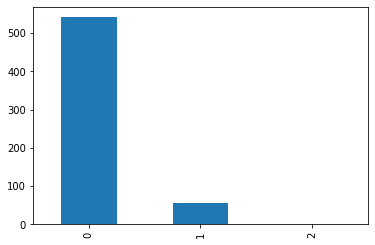

In [102]:
df['Number of Bugs'].value_counts().plot(kind='bar')

In [103]:
df

,Hash,LongName,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
0,ba899dd5f05492b8c6e3e410d6a833c63392bf63,com.cloudera.oryx.lambda.serving.SecureAPIConf...,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27e9046b2bd92243c260efd8bcd0af46b92bdf9e,com.cloudera.oryx.app.serving.kmeans.Console,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27e9046b2bd92243c260efd8bcd0af46b92bdf9e,com.cloudera.oryx.app.serving.rdf.Console,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27e9046b2bd92243c260efd8bcd0af46b92bdf9e,com.cloudera.oryx.app.serving.als.Console,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,d16f89b25fc5e12f94af6432274c66e0394c1743,com.cloudera.oryx.app.serving.rdf.Console,0.000000,0,0,0,0.000000,0.000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,31fb3c41d9d4b4650dd5da05b2212c7d27cb1da9,com.cloudera.oryx.app.mllib.rdf.RDFCategorical...,0.685644,4,4,4,0.620253,0.625,49,40,...,0,0,0,0,0,0,1,0,0,1
594,8de37c9b69a6688bc4af8f1d3601161a942aff58,com.cloudera.oryx.lambda.HadoopUtilsTest,0.904762,1,1,1,0.714286,0.800,10,8,...,0,0,0,0,0,0,0,0,0,0
595,8de37c9b69a6688bc4af8f1d3601161a942aff58,com.cloudera.oryx.lambda.HadoopUtilsTest$1,1.000000,1,1,1,1.000000,1.000,6,5,...,0,0,0,0,0,0,0,0,0,0
596,fddb336ac30ea3fb0bde91c61ef043f523d7d9fe,com.cloudera.oryx.lambda.serving.ModelManagerL...,1.000000,1,1,1,1.000000,1.000,6,6,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df.drop('Hash', axis=1, inplace=True)
df.drop('LongName', axis=1, inplace=True)

In [105]:
df

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Migration15 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Vulnerability Rules,Number of Bugs
0,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.685644,4,4,4,0.620253,0.625,49,40,1,3,...,0,0,0,0,0,0,1,0,0,1
594,0.904762,1,1,1,0.714286,0.800,10,8,1,0,...,0,0,0,0,0,0,0,0,0,0
595,1.000000,1,1,1,1.000000,1.000,6,5,1,0,...,0,0,0,0,0,0,0,0,0,0
596,1.000000,1,1,1,1.000000,1.000,6,6,1,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df['Migration15 Rules'].value_counts()

0    598
Name: Migration15 Rules, dtype: int64

In [107]:
df['Vulnerability Rules'].value_counts()

0    598
Name: Vulnerability Rules, dtype: int64

In [108]:
df.drop('Migration15 Rules', axis=1, inplace=True)
df.drop('Vulnerability Rules', axis=1, inplace=True)

In [109]:
df

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Migration13 Rules,Migration14 Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Number of Bugs
0,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0,0,0,0.000000,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.685644,4,4,4,0.620253,0.625,49,40,1,3,...,0,0,0,0,0,0,0,1,0,1
594,0.904762,1,1,1,0.714286,0.800,10,8,1,0,...,0,0,0,0,0,0,0,0,0,0
595,1.000000,1,1,1,1.000000,1.000,6,5,1,0,...,0,0,0,0,0,0,0,0,0,0
596,1.000000,1,1,1,1.000000,1.000,6,6,1,0,...,0,0,0,0,0,0,0,0,0,0


از آنجا که تعداد ستونها زیاد است و بررسی یک به یک آنها وقت گیر می باشد از دستور زیر برای حذف ستون با مقادیر مشابه در کل دیتافریم استفاده کردم

In [110]:
df = df.T.drop_duplicates().T

In [111]:
df

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Java Logging Rules,JavaBean Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Number of Bugs
0,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.685644,4.0,4.0,4.0,0.620253,0.625,49.0,40.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
594,0.904762,1.0,1.0,1.0,0.714286,0.800,10.0,8.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
595,1.000000,1.0,1.0,1.0,1.000000,1.000,6.0,5.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,1.000000,1.0,1.0,1.0,1.000000,1.000,6.0,6.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 74 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CC                                 598 non-null    float64
 1   CCL                                598 non-null    float64
 2   CCO                                598 non-null    float64
 3   CI                                 598 non-null    float64
 4   CLC                                598 non-null    float64
 5   CLLC                               598 non-null    float64
 6   LDC                                598 non-null    float64
 7   LLDC                               598 non-null    float64
 8   LCOM5                              598 non-null    float64
 9   NL                                 598 non-null    float64
 10  NLE                                598 non-null    float64
 11  WMC                                598 non-null    float64

In [113]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [114]:
train_set

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Java Logging Rules,JavaBean Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Number of Bugs
485,0.195652,1.0,2.0,1.0,0.171053,0.178571,13.0,10.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
535,0.338028,1.0,1.0,1.0,0.280702,0.272727,16.0,12.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
156,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
test_set

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Java Logging Rules,JavaBean Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Number of Bugs
541,0.373874,2.0,7.0,2.0,0.328244,0.339623,43.0,36.0,1.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
548,0.385604,4.0,12.0,4.0,0.393443,0.393548,72.0,61.0,1.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,4.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,4.0,1.0
235,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
221,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
test_set.describe()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Java Logging Rules,JavaBean Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Number of Bugs
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.0,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000
mean,0.082319,0.375000,0.883333,0.425000,0.076405,0.078001,6.783333,5.608333,1.758333,1.783333,...,0.008333,0.008333,0.666667,0.0,0.033333,0.041667,0.100000,0.20000,0.358333,0.141667
std,0.182722,0.810255,2.227345,0.967215,0.168061,0.173235,16.420004,13.860830,1.613993,1.251442,...,0.091287,0.091287,0.792118,0.0,0.365148,0.238899,0.556097,0.51204,2.255882,0.373398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.006757,0.250000,0.250000,0.250000,0.005495,0.006944,1.500000,1.500000,2.000000,3.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,5.000000,13.000000,6.000000,1.000000,1.000000,87.000000,77.000000,9.000000,5.000000,...,1.000000,1.000000,4.000000,0.0,4.000000,2.000000,5.000000,3.00000,20.000000,2.000000


In [120]:
train_set.describe()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Java Logging Rules,JavaBean Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Number of Bugs
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,...,478.0,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,0.083942,0.420502,0.983264,0.449791,0.076175,0.078060,7.646444,6.470711,1.612971,1.815900,...,0.0,0.010460,0.794979,0.031381,0.043933,0.018828,0.110879,0.246862,0.294979,0.085774
std,0.173945,1.044582,2.821699,1.079924,0.159314,0.162359,19.805196,16.868780,1.556349,1.285134,...,0.0,0.101846,1.570101,0.174527,0.259323,0.150684,0.562868,0.584335,1.874136,0.280324
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,8.000000,22.000000,8.000000,1.000000,1.000000,150.000000,126.000000,11.000000,5.000000,...,0.0,1.000000,11.000000,1.000000,3.000000,2.000000,5.000000,4.000000,20.000000,1.000000


In [121]:
minValues = train_set.min()

In [122]:
minValues

CC                                   0.0
CCL                                  0.0
CCO                                  0.0
CI                                   0.0
CLC                                  0.0
                                    ... 
Strict Exception Rules               0.0
String and StringBuffer Rules        0.0
Type Resolution Rules                0.0
Unnecessary and Unused Code Rules    0.0
Number of Bugs                       0.0
Length: 74, dtype: float64

In [123]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 485 to 396
Data columns (total 74 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CC                                 478 non-null    float64
 1   CCL                                478 non-null    float64
 2   CCO                                478 non-null    float64
 3   CI                                 478 non-null    float64
 4   CLC                                478 non-null    float64
 5   CLLC                               478 non-null    float64
 6   LDC                                478 non-null    float64
 7   LLDC                               478 non-null    float64
 8   LCOM5                              478 non-null    float64
 9   NL                                 478 non-null    float64
 10  NLE                                478 non-null    float64
 11  WMC                                478 non-null    float

In [124]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 541 to 118
Data columns (total 74 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CC                                 120 non-null    float64
 1   CCL                                120 non-null    float64
 2   CCO                                120 non-null    float64
 3   CI                                 120 non-null    float64
 4   CLC                                120 non-null    float64
 5   CLLC                               120 non-null    float64
 6   LDC                                120 non-null    float64
 7   LLDC                               120 non-null    float64
 8   LCOM5                              120 non-null    float64
 9   NL                                 120 non-null    float64
 10  NLE                                120 non-null    float64
 11  WMC                                120 non-null    float

In [125]:
df.pop("Number of Bugs")

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
593    1.0
594    0.0
595    0.0
596    0.0
597    0.0
Name: Number of Bugs, Length: 598, dtype: float64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 73 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CC                                 598 non-null    float64
 1   CCL                                598 non-null    float64
 2   CCO                                598 non-null    float64
 3   CI                                 598 non-null    float64
 4   CLC                                598 non-null    float64
 5   CLLC                               598 non-null    float64
 6   LDC                                598 non-null    float64
 7   LLDC                               598 non-null    float64
 8   LCOM5                              598 non-null    float64
 9   NL                                 598 non-null    float64
 10  NLE                                598 non-null    float64
 11  WMC                                598 non-null    float64

In [127]:
columnsToNormalize = list(df.columns.values)
for column in columnsToNormalize:
  minValueOfCol = train_set[column].min()
  maxValueOfCol = train_set[column].max()
  
  train_set[column] = (train_set[column] - minValueOfCol) / (maxValueOfCol-minValueOfCol)
  test_set[column] = (test_set[column] - minValueOfCol) / (maxValueOfCol-minValueOfCol)

In [128]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 485 to 396
Data columns (total 74 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CC                                 478 non-null    float64
 1   CCL                                478 non-null    float64
 2   CCO                                478 non-null    float64
 3   CI                                 478 non-null    float64
 4   CLC                                478 non-null    float64
 5   CLLC                               478 non-null    float64
 6   LDC                                478 non-null    float64
 7   LLDC                               478 non-null    float64
 8   LCOM5                              478 non-null    float64
 9   NL                                 478 non-null    float64
 10  NLE                                478 non-null    float64
 11  WMC                                478 non-null    float

In [129]:
train_set.describe()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Java Logging Rules,JavaBean Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Number of Bugs
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,...,0.0,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,0.083942,0.052563,0.044694,0.056224,0.076175,0.078060,0.050976,0.051355,0.146634,0.363180,...,NaN,0.010460,0.072271,0.031381,0.014644,0.009414,0.022176,0.061715,0.014749,0.085774
std,0.173945,0.130573,0.128259,0.134991,0.159314,0.162359,0.132035,0.133879,0.141486,0.257027,...,NaN,0.101846,0.142736,0.174527,0.086441,0.075342,0.112574,0.146084,0.093707,0.280324
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.200000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.400000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.600000,...,NaN,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
train_set.describe()

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Java Logging Rules,JavaBean Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules,Number of Bugs
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,...,0.0,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,0.083942,0.052563,0.044694,0.056224,0.076175,0.078060,0.050976,0.051355,0.146634,0.363180,...,NaN,0.010460,0.072271,0.031381,0.014644,0.009414,0.022176,0.061715,0.014749,0.085774
std,0.173945,0.130573,0.128259,0.134991,0.159314,0.162359,0.132035,0.133879,0.141486,0.257027,...,NaN,0.101846,0.142736,0.174527,0.086441,0.075342,0.112574,0.146084,0.093707,0.280324
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.200000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.400000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.600000,...,NaN,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
test_target = test_set.pop("Number of Bugs")
test_features = test_set

train_target = train_set.pop("Number of Bugs")
train_features = train_set

In [132]:
test_set

,CC,CCL,CCO,CI,CLC,CLLC,LDC,LLDC,LCOM5,NL,...,Jakarta Commons Logging Rules,Java Logging Rules,JavaBean Rules,Naming Rules,Optimization Rules,Security Code Guideline Rules,Strict Exception Rules,String and StringBuffer Rules,Type Resolution Rules,Unnecessary and Unused Code Rules
541,0.373874,0.25,0.318182,0.25,0.328244,0.339623,0.286667,0.285714,0.090909,0.6,...,0.0,NaN,0.0,0.090909,0.0,0.0,0.0,0.0,0.00,0.0
548,0.385604,0.50,0.545455,0.50,0.393443,0.393548,0.480000,0.484127,0.090909,0.6,...,0.0,NaN,0.0,0.090909,0.0,0.0,0.0,0.0,0.00,0.0
88,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.090909,0.2,...,0.0,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0
302,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.090909,0.8,...,0.0,NaN,0.0,0.090909,0.0,0.0,1.0,0.0,0.00,0.2
235,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.090909,0.6,...,0.0,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.181818,0.2,...,0.0,NaN,0.0,0.090909,0.0,0.0,0.0,0.0,0.00,0.0
216,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.090909,0.4,...,0.0,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0
16,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.090909,0.0,...,0.0,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.25,0.0
221,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.090909,0.4,...,0.0,NaN,0.0,0.090909,0.0,0.0,0.0,0.0,0.00,0.0


In [133]:
test_features, train_features

(           CC   CCL       CCO    CI       CLC      CLLC       LDC      LLDC  \
 541  0.373874  0.25  0.318182  0.25  0.328244  0.339623  0.286667  0.285714   
 548  0.385604  0.50  0.545455  0.50  0.393443  0.393548  0.480000  0.484127   
 88   0.000000  0.00  0.000000  0.00  0.000000  0.000000  0.000000  0.000000   
 302  0.000000  0.00  0.000000  0.00  0.000000  0.000000  0.000000  0.000000   
 235  0.000000  0.00  0.000000  0.00  0.000000  0.000000  0.000000  0.000000   
 ..        ...   ...       ...   ...       ...       ...       ...       ...   
 341  0.000000  0.00  0.000000  0.00  0.000000  0.000000  0.000000  0.000000   
 216  0.000000  0.00  0.000000  0.00  0.000000  0.000000  0.000000  0.000000   
 16   0.000000  0.00  0.000000  0.00  0.000000  0.000000  0.000000  0.000000   
 221  0.000000  0.00  0.000000  0.00  0.000000  0.000000  0.000000  0.000000   
 118  0.000000  0.00  0.000000  0.00  0.000000  0.000000  0.000000  0.000000   
 
         LCOM5   NL  ...  Jakarta Comm

In [134]:
test_target, train_target

(541    0.0
 548    0.0
 88     0.0
 302    1.0
 235    0.0
       ... 
 341    0.0
 216    0.0
 16     0.0
 221    0.0
 118    0.0
 Name: Number of Bugs, Length: 120, dtype: float64, 485    0.0
 6      0.0
 404    0.0
 179    0.0
 37     0.0
       ... 
 347    0.0
 7      0.0
 535    1.0
 156    0.0
 396    0.0
 Name: Number of Bugs, Length: 478, dtype: float64)

In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import export_graphviz
from IPython import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

random forest

In [ ]:
print('Random forest')

from sklearn.ensemble import RandomForestClassifier
'''Create random forest classifier'''
model1 = RandomForestClassifier()
model2 = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_depth = 1, random_state = 80)
model3 = RandomForestClassifier(n_estimators=90, criterion = 'entropy' , max_depth = 10, random_state = 50)
model4 = RandomForestClassifier(n_estimators=50, criterion = 'entropy', max_depth = 20, random_state = 60)
model5 = RandomForestClassifier(n_estimators=1, criterion = 'gini', max_depth = 30, random_state = 40)

'''Train and test'''
model1.fit(train_features, train_target)
model2.fit(train_features, train_target)
model3.fit(train_features, train_target)
model4.fit(train_features, train_target)
model5.fit(train_features, train_target)

preds1 = model1.predict(test_features)
preds2 = model2.predict(test_features)
preds3 = model3.predict(test_features)
preds4 = model4.predict(test_features)
preds5 = model5.predict(test_features)

cr1 = confusion_matrix(test_target, preds1)
cr2 = confusion_matrix(test_target, preds2)
cr3 = confusion_matrix(test_target, preds3)
cr4 = confusion_matrix(test_target, preds4)
cr5 = confusion_matrix(test_target, preds5)

from sklearn.metrics import f1_score

f1_weighted1 = f1_score(test_target, preds1, average = 'weighted')
f1_weighted2 = f1_score(test_target, preds2, average = 'weighted')
f1_weighted3 = f1_score(test_target, preds3, average = 'weighted')
f1_weighted4 = f1_score(test_target, preds4, average = 'weighted')
f1_weighted5 = f1_score(test_target, preds5, average = 'weighted')

f1_macro1 = f1_score(test_target, preds1, average = 'macro')
f1_macro2 = f1_score(test_target, preds2, average = 'macro')
f1_macro3 = f1_score(test_target, preds3, average = 'macro')
f1_macro4 = f1_score(test_target, preds4, average = 'macro')
f1_macro5 = f1_score(test_target, preds5, average = 'macro')

f1_micro1 = f1_score(test_target, preds1, average = 'micro')
f1_micro2 = f1_score(test_target, preds2, average = 'micro')
f1_micro3 = f1_score(test_target, preds3, average = 'micro')
f1_micro4 = f1_score(test_target, preds4, average = 'micro')
f1_micro5 = f1_score(test_target, preds5, average = 'micro')

f1_score_weighted1 = "%.2f"%round(f1_weighted1, 2)
f1_score_weighted2 = "%.2f"%round(f1_weighted2, 2)
f1_score_weighted3 = "%.2f"%round(f1_weighted3, 2)
f1_score_weighted4 = "%.2f"%round(f1_weighted4, 2)
f1_score_weighted5 = "%.2f"%round(f1_weighted5, 2)

f1_score_macro1 = "%.2f"%round(f1_macro1, 2)
f1_score_macro2 = "%.2f"%round(f1_macro2, 2)
f1_score_macro3 = "%.2f"%round(f1_macro3, 2)
f1_score_macro4 = "%.2f"%round(f1_macro4, 2)
f1_score_macro5 = "%.2f"%round(f1_macro5, 2)

f1_score_micro1 = "%.2f"%round(f1_micro1, 2)
f1_score_micro2 = "%.2f"%round(f1_micro2, 2)
f1_score_micro3 = "%.2f"%round(f1_micro3, 2)
f1_score_micro4 = "%.2f"%round(f1_micro4, 2)
f1_score_micro5 = "%.2f"%round(f1_micro5, 2)

head = PrettyTable(['random_state', 'n_estimatorsint', 'criterion', 'max_depth', 'confusion_matrix', 'f1_score_weighted', 'f1_score_macro', 'f1_score_micro']) 
head.add_row(['', '', '', '', cr1, f1_score_weighted1, f1_score_macro1, f1_score_micro1]) 
head.add_row(['80', '10', 'gini', '1', cr2, f1_score_weighted2, f1_score_macro2, f1_score_micro2]) 
head.add_row(['50', '100', 'entropy', '10', cr3, f1_score_weighted3, f1_score_macro3, f1_score_micro3]) 
head.add_row(['60', '50', 'entropy', '20', cr4, f1_score_weighted4, f1_score_macro4, f1_score_micro4]) 
head.add_row(['40', '1', 'gini', '30', cr5, f1_score_weighted5, f1_score_macro5, f1_score_micro5]) 
print(head)

Random forest
+--------------+-----------------+-----------+-----------+------------------+-------------------+----------------+----------------+
| random_state | n_estimatorsint | criterion | max_depth | confusion_matrix | f1_score_weighted | f1_score_macro | f1_score_micro |
+--------------+-----------------+-----------+-----------+------------------+-------------------+----------------+----------------+
|              |                 |           |           |    [[129  13]    |        0.89       |      0.55      |      0.87      |
|              |                 |           |           |    [  6   2]]    |                   |                |                |
|      80      |        10       |    gini   |     1     |    [[142   0]    |        0.92       |      0.49      |      0.95      |
|              |                 |           |           |    [  8   0]]    |                   |                |                |
|      50      |       100       |  entropy  |     10    |    

logistic regression

In [ ]:
print('Logistic regression')
from sklearn.linear_model import LogisticRegression

'''Create logistic regression classifier'''  
model1 = LogisticRegression()
model2 = LogisticRegression(solver='sag', penalty='l2',n_jobs=-1, random_state=10)
model3 = LogisticRegression(solver='saga', penalty='l2',n_jobs=-1, random_state=20)
model4 = LogisticRegression(solver='liblinear', penalty='l1',n_jobs=-1, random_state=0)
model5 = LogisticRegression(solver='liblinear', penalty='l2',n_jobs=-1, random_state=90)
model6 = LogisticRegression(solver='lbfgs', penalty='l2',n_jobs=-1, random_state=50)
model7 = LogisticRegression(solver='newton-cg', penalty='l2',n_jobs=-1, random_state=90)

'''Train and test'''
model1.fit(train_features, train_target)
model2.fit(train_features, train_target)
model3.fit(train_features, train_target)
model4.fit(train_features, train_target)
model5.fit(train_features, train_target)
model6.fit(train_features, train_target)
model7.fit(train_features, train_target)

preds1 = model1.predict(test_features)
preds2 = model2.predict(test_features)
preds3 = model3.predict(test_features)
preds4 = model4.predict(test_features)
preds5 = model5.predict(test_features)
preds6 = model5.predict(test_features)
preds7 = model5.predict(test_features)

cr1 = confusion_matrix(test_target, preds1)
cr2 = confusion_matrix(test_target, preds2)
cr3 = confusion_matrix(test_target, preds3)
cr4 = confusion_matrix(test_target, preds4)
cr5 = confusion_matrix(test_target, preds5)
cr6 = confusion_matrix(test_target, preds5)
cr7 = confusion_matrix(test_target, preds5)

from sklearn.metrics import f1_score

f1_weighted1 = f1_score(test_target, preds1, average = 'weighted')
f1_weighted2 = f1_score(test_target, preds2, average = 'weighted')
f1_weighted3 = f1_score(test_target, preds3, average = 'weighted')
f1_weighted4 = f1_score(test_target, preds4, average = 'weighted')
f1_weighted5 = f1_score(test_target, preds5, average = 'weighted')
f1_weighted6 = f1_score(test_target, preds5, average = 'weighted')
f1_weighted7 = f1_score(test_target, preds5, average = 'weighted')

f1_macro1 = f1_score(test_target, preds1, average = 'macro')
f1_macro2 = f1_score(test_target, preds2, average = 'macro')
f1_macro3 = f1_score(test_target, preds3, average = 'macro')
f1_macro4 = f1_score(test_target, preds4, average = 'macro')
f1_macro5 = f1_score(test_target, preds5, average = 'macro')
f1_macro6 = f1_score(test_target, preds5, average = 'macro')
f1_macro7 = f1_score(test_target, preds5, average = 'macro')

f1_micro1 = f1_score(test_target, preds1, average = 'micro')
f1_micro2 = f1_score(test_target, preds2, average = 'micro')
f1_micro3 = f1_score(test_target, preds3, average = 'micro')
f1_micro4 = f1_score(test_target, preds4, average = 'micro')
f1_micro5 = f1_score(test_target, preds5, average = 'micro')
f1_micro6 = f1_score(test_target, preds5, average = 'micro')
f1_micro7 = f1_score(test_target, preds5, average = 'micro')
 
f1_score_weighted1 = "%.2f"%round(f1_weighted1, 2)
f1_score_weighted2 = "%.2f"%round(f1_weighted2, 2)
f1_score_weighted3 = "%.2f"%round(f1_weighted3, 2)
f1_score_weighted4 = "%.2f"%round(f1_weighted4, 2)
f1_score_weighted5 = "%.2f"%round(f1_weighted5, 2)
f1_score_weighted6 = "%.2f"%round(f1_weighted6, 2)
f1_score_weighted7 = "%.2f"%round(f1_weighted7, 2)

f1_score_macro1 = "%.2f"%round(f1_macro1, 2)
f1_score_macro2 = "%.2f"%round(f1_macro2, 2)
f1_score_macro3 = "%.2f"%round(f1_macro3, 2)
f1_score_macro4 = "%.2f"%round(f1_macro4, 2)
f1_score_macro5 = "%.2f"%round(f1_macro5, 2)
f1_score_macro6 = "%.2f"%round(f1_macro6, 2)
f1_score_macro7 = "%.2f"%round(f1_macro7, 2)

f1_score_micro1 = "%.2f"%round(f1_micro1, 2)
f1_score_micro2 = "%.2f"%round(f1_micro2, 2)
f1_score_micro3 = "%.2f"%round(f1_micro3, 2)
f1_score_micro4 = "%.2f"%round(f1_micro4, 2)
f1_score_micro5 = "%.2f"%round(f1_micro5, 2)
f1_score_micro6 = "%.2f"%round(f1_micro6, 2)
f1_score_micro7 = "%.2f"%round(f1_micro7, 2)

head = PrettyTable(['random_state', 'solver', 'penalty', 'n_jobs', 'confusion_matrix', 'f1_score_weighted', 'f1_score_macro', 'f1_score_micro']) 
head.add_row(['', '', '', '', cr1, f1_score_weighted1, f1_score_macro1, f1_score_micro1]) 
head.add_row(['10', 'sag', 'l2', '-1', cr2, f1_score_weighted2, f1_score_macro2, f1_score_micro2]) 
head.add_row(['20', 'saga', 'l2', '-1', cr3, f1_score_weighted3, f1_score_macro3, f1_score_micro3]) 
head.add_row(['0', 'liblinear', 'l1', '-1', cr4, f1_score_weighted4, f1_score_macro4, f1_score_micro4]) 
head.add_row(['90', 'liblinear', 'l2', '-1', cr5, f1_score_weighted5, f1_score_macro5, f1_score_micro5]) 
head.add_row(['50', 'lbfgs', 'l2', '-1', cr6, f1_score_weighted6, f1_score_macro6, f1_score_micro6]) 
head.add_row(['90', 'newton-cg', 'l2', '-1', cr7, f1_score_weighted7, f1_score_macro7, f1_score_micro7]) 
print(head)

Logistic regression


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver

+--------------+-----------+---------+--------+------------------+-------------------+----------------+----------------+
| random_state |   solver  | penalty | n_jobs | confusion_matrix | f1_score_weighted | f1_score_macro | f1_score_micro |
+--------------+-----------+---------+--------+------------------+-------------------+----------------+----------------+
|              |           |         |        |    [[123   6]    |        0.80       |      0.52      |      0.83      |
|              |           |         |        |    [ 19   2]]    |                   |                |                |
|      10      |    sag    |    l2   |   -1   |    [[127   2]    |        0.79       |      0.46      |      0.85      |
|              |           |         |        |    [ 21   0]]    |                   |                |                |
|      20      |    saga   |    l2   |   -1   |    [[129   0]    |        0.80       |      0.46      |      0.86      |
|              |           |    

naive bayes

In [ ]:
print('Naive bayes')
from sklearn.naive_bayes import GaussianNB

'''Create Naive bayes classifier'''
model1 = GaussianNB()
model2 = GaussianNB(var_smoothing = 1e-11)
model3 = GaussianNB(var_smoothing = 1e-09)
model4 = GaussianNB(var_smoothing = 1e-10)

'''Train and test'''
model1.fit(train_features, train_target)
model2.fit(train_features, train_target)
model3.fit(train_features, train_target)
model4.fit(train_features, train_target)

preds1 = model1.predict(test_features)
preds2 = model2.predict(test_features)
preds3 = model3.predict(test_features)
preds4 = model4.predict(test_features)

cr1 = confusion_matrix(test_target, preds1)
cr2 = confusion_matrix(test_target, preds2)
cr3 = confusion_matrix(test_target, preds3)
cr4 = confusion_matrix(test_target, preds4)

from sklearn.metrics import f1_score

f1_weighted1 = f1_score(test_target, preds1, average = 'weighted')
f1_weighted2 = f1_score(test_target, preds2, average = 'weighted')
f1_weighted3 = f1_score(test_target, preds3, average = 'weighted')
f1_weighted4 = f1_score(test_target, preds4, average = 'weighted')

f1_macro1 = f1_score(test_target, preds1, average = 'macro')
f1_macro2 = f1_score(test_target, preds2, average = 'macro')
f1_macro3 = f1_score(test_target, preds3, average = 'macro')
f1_macro4 = f1_score(test_target, preds4, average = 'macro')

f1_micro1 = f1_score(test_target, preds1, average = 'micro')
f1_micro2 = f1_score(test_target, preds2, average = 'micro')
f1_micro3 = f1_score(test_target, preds3, average = 'micro')
f1_micro4 = f1_score(test_target, preds4, average = 'micro')

f1_score_weighted1 = "%.2f"%round(f1_weighted1, 2)
f1_score_weighted2 = "%.2f"%round(f1_weighted2, 2)
f1_score_weighted3 = "%.2f"%round(f1_weighted3, 2)
f1_score_weighted4 = "%.2f"%round(f1_weighted4, 2)

f1_score_macro1 = "%.2f"%round(f1_macro1, 2)
f1_score_macro2 = "%.2f"%round(f1_macro2, 2)
f1_score_macro3 = "%.2f"%round(f1_macro3, 2)
f1_score_macro4 = "%.2f"%round(f1_macro4, 2)

f1_score_micro1 = "%.2f"%round(f1_micro1, 2)
f1_score_micro2 = "%.2f"%round(f1_micro2, 2)
f1_score_micro3 = "%.2f"%round(f1_micro3, 2)
f1_score_micro4 = "%.2f"%round(f1_micro4, 2)

head = PrettyTable(['var_smoothing', 'confusion_matrix', 'f1_score_weighted', 'f1_score_macro', 'f1_score_micro']) 
head.add_row(['', cr1, f1_score_weighted1, f1_score_macro1, f1_score_micro1]) 
head.add_row(['1e-11', cr2, f1_score_weighted2, f1_score_macro2, f1_score_micro2]) 
head.add_row(['1e-9', cr3, f1_score_weighted3, f1_score_macro3, f1_score_micro3]) 
head.add_row(['1e-10', cr4, f1_score_weighted4, f1_score_macro4, f1_score_micro4]) 
print(head)

Naive bayes
+---------------+------------------+-------------------+----------------+----------------+
| var_smoothing | confusion_matrix | f1_score_weighted | f1_score_macro | f1_score_micro |
+---------------+------------------+-------------------+----------------+----------------+
|               |     [[89 53]     |        0.74       |      0.50      |      0.65      |
|               |     [ 0  8]]     |                   |                |                |
|     1e-11     |     [[58 84]     |        0.56       |      0.37      |      0.44      |
|               |     [ 0  8]]     |                   |                |                |
|      1e-9     |     [[89 53]     |        0.74       |      0.50      |      0.65      |
|               |     [ 0  8]]     |                   |                |                |
|     1e-10     |     [[69 73]     |        0.63       |      0.42      |      0.51      |
|               |     [ 0  8]]     |                   |                |     

Multi-Layer Perceptron Neural Network

In [ ]:
print('Multi layer perceptron neural network')
from sklearn.neural_network import MLPClassifier

'''Create Artificial Neural Network classifier'''
model1 = MLPClassifier()
model2 = MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(5, 2), activation = 'tanh', random_state=10)
model3 = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(150, 100, 50), activation = 'logistic',random_state=1)
model4 = MLPClassifier(solver='adam', alpha=0.05, hidden_layer_sizes=(100, 50, 30), activation = 'relu', random_state=90)
model5 = MLPClassifier(solver='lbfgs', alpha=0.0001, hidden_layer_sizes=(120, 80, 40), activation = 'identity', random_state=40)

'''Train and test'''
model1.fit(train_features, train_target)
model2.fit(train_features, train_target)
model3.fit(train_features, train_target)
model4.fit(train_features, train_target)
model5.fit(train_features, train_target)

preds1 = model1.predict(test_features)
preds2 = model2.predict(test_features)
preds3 = model3.predict(test_features)
preds4 = model4.predict(test_features)
preds5 = model5.predict(test_features)

cr1 = confusion_matrix(test_target, preds1)
cr2 = confusion_matrix(test_target, preds2)
cr3 = confusion_matrix(test_target, preds3)
cr4 = confusion_matrix(test_target, preds4)
cr5 = confusion_matrix(test_target, preds5)

from sklearn.metrics import f1_score

f1_weighted1 = f1_score(test_target, preds1, average = 'weighted')
f1_weighted2 = f1_score(test_target, preds2, average = 'weighted')
f1_weighted3 = f1_score(test_target, preds3, average = 'weighted')
f1_weighted4 = f1_score(test_target, preds4, average = 'weighted')
f1_weighted5 = f1_score(test_target, preds5, average = 'weighted')

f1_macro1 = f1_score(test_target, preds1, average = 'macro')
f1_macro2 = f1_score(test_target, preds2, average = 'macro')
f1_macro3 = f1_score(test_target, preds3, average = 'macro')
f1_macro4 = f1_score(test_target, preds4, average = 'macro')
f1_macro5 = f1_score(test_target, preds5, average = 'macro')

f1_micro1 = f1_score(test_target, preds1, average = 'micro')
f1_micro2 = f1_score(test_target, preds2, average = 'micro')
f1_micro3 = f1_score(test_target, preds3, average = 'micro')
f1_micro4 = f1_score(test_target, preds4, average = 'micro')
f1_micro5 = f1_score(test_target, preds5, average = 'micro')

f1_score_weighted1 = "%.2f"%round(f1_weighted1, 2)
f1_score_weighted2 = "%.2f"%round(f1_weighted2, 2)
f1_score_weighted3 = "%.2f"%round(f1_weighted3, 2)
f1_score_weighted4 = "%.2f"%round(f1_weighted4, 2)
f1_score_weighted5 = "%.2f"%round(f1_weighted5, 2)

f1_score_macro1 = "%.2f"%round(f1_macro1, 2)
f1_score_macro2 = "%.2f"%round(f1_macro2, 2)
f1_score_macro3 = "%.2f"%round(f1_macro3, 2)
f1_score_macro4 = "%.2f"%round(f1_macro4, 2)
f1_score_macro5 = "%.2f"%round(f1_macro5, 2)

f1_score_micro1 = "%.2f"%round(f1_micro1, 2)
f1_score_micro2 = "%.2f"%round(f1_micro2, 2)
f1_score_micro3 = "%.2f"%round(f1_micro3, 2)
f1_score_micro4 = "%.2f"%round(f1_micro4, 2)
f1_score_micro5 = "%.2f"%round(f1_micro5, 2)

head = PrettyTable(['random_state', 'activation', 'solver', 'hidden_layer_sizestuple', 'alpha', 'confusion_matrix', 'f1_score_weighted', 'f1_score_macro', 'f1_score_micro']) 
head.add_row(['', '', '', '', '', cr1, f1_score_weighted1, f1_score_macro1, f1_score_micro1]) 
head.add_row(['10', 'tanh', 'lbfgs', '(5, 2)', '0.01', cr2, f1_score_weighted2, f1_score_macro2, f1_score_micro2]) 
head.add_row(['1', 'logistic', 'sgd', '(150, 100, 50)', 'le-5', cr3, f1_score_weighted3, f1_score_macro3, f1_score_micro3]) 
head.add_row(['90', 'relu', 'adam', '(100, 50, 30)', '0.05', cr4, f1_score_weighted4, f1_score_macro4, f1_score_micro4]) 
head.add_row(['40', 'identity', 'lbfgs', '(120, 80, 40)', '0.0001', cr5, f1_score_weighted5, f1_score_macro5, f1_score_micro5]) 
print(head)

Multi layer perceptron neural network
+--------------+------------+--------+-------------------------+--------+------------------+-------------------+----------------+----------------+
| random_state | activation | solver | hidden_layer_sizestuple | alpha  | confusion_matrix | f1_score_weighted | f1_score_macro | f1_score_micro |
+--------------+------------+--------+-------------------------+--------+------------------+-------------------+----------------+----------------+
|              |            |        |                         |        |    [[123   6]    |        0.81       |      0.56      |      0.84      |
|              |            |        |                         |        |    [ 18   3]]    |                   |                |                |
|      10      |    tanh    | lbfgs  |          (5, 2)         |  0.01  |    [[129   0]    |        0.80       |      0.46      |      0.86      |
|              |            |        |                         |        |    [ 2

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Support vector machine

In [ ]:
print('Support vector machine')
from sklearn.svm import SVC

'''Create Artificial Neural Network classifier'''
model1 = SVC()
model2 = SVC(kernel='sigmoid', C=100, gamma=1, random_state=85)
model3 = SVC(kernel='rbf', C=0.1, gamma=0.01, random_state=15)
model4 = SVC(kernel='linear', C=1, gamma=0.001, random_state=74)

'''Train and test'''
model1.fit(train_features, train_target)
model2.fit(train_features, train_target)
model3.fit(train_features, train_target)
model4.fit(train_features, train_target)

preds1 = model1.predict(test_features)
preds2 = model2.predict(test_features)
preds3 = model3.predict(test_features)
preds4 = model4.predict(test_features)

cr1 = confusion_matrix(test_target, preds1)
cr2 = confusion_matrix(test_target, preds2)
cr3 = confusion_matrix(test_target, preds3)
cr4 = confusion_matrix(test_target, preds4)

from sklearn.metrics import f1_score

f1_weighted1 = f1_score(test_target, preds1, average = 'weighted')
f1_weighted2 = f1_score(test_target, preds2, average = 'weighted')
f1_weighted3 = f1_score(test_target, preds3, average = 'weighted')
f1_weighted4 = f1_score(test_target, preds4, average = 'weighted')

f1_macro1 = f1_score(test_target, preds1, average = 'macro')
f1_macro2 = f1_score(test_target, preds2, average = 'macro')
f1_macro3 = f1_score(test_target, preds3, average = 'macro')
f1_macro4 = f1_score(test_target, preds4, average = 'macro')

f1_micro1 = f1_score(test_target, preds1, average = 'micro')
f1_micro2 = f1_score(test_target, preds2, average = 'micro')
f1_micro3 = f1_score(test_target, preds3, average = 'micro')
f1_micro4 = f1_score(test_target, preds4, average = 'micro')

f1_score_weighted1 = "%.2f"%round(f1_weighted1, 2)
f1_score_weighted2 = "%.2f"%round(f1_weighted2, 2)
f1_score_weighted3 = "%.2f"%round(f1_weighted3, 2)
f1_score_weighted4 = "%.2f"%round(f1_weighted4, 2)

f1_score_macro1 = "%.2f"%round(f1_macro1, 2)
f1_score_macro2 = "%.2f"%round(f1_macro2, 2)
f1_score_macro3 = "%.2f"%round(f1_macro3, 2)
f1_score_macro4 = "%.2f"%round(f1_macro4, 2)

f1_score_micro1 = "%.2f"%round(f1_micro1, 2)
f1_score_micro2 = "%.2f"%round(f1_micro2, 2)
f1_score_micro3 = "%.2f"%round(f1_micro3, 2)
f1_score_micro4 = "%.2f"%round(f1_micro4, 2)

head = PrettyTable(['random_state', 'c', 'gamma', 'kernel', 'confusion_matrix', 'f1_score_weighted', 'f1_score_macro', 'f1_score_micro']) 
head.add_row(['', '', '', '', cr1, f1_score_weighted1, f1_score_macro1, f1_score_micro1]) 
head.add_row(['85', '100', '1', 'sigmoid', cr2, f1_score_weighted2, f1_score_macro2, f1_score_micro2]) 
head.add_row(['15', '0.01', '0.01', 'rbf', cr3, f1_score_weighted3, f1_score_macro3, f1_score_micro3]) 
head.add_row(['74', '1', '0.001', 'linear', cr4, f1_score_weighted4, f1_score_macro4, f1_score_micro4]) 
print(head)

Support vector machine
+--------------+------+-------+---------+------------------+-------------------+----------------+----------------+
| random_state |  c   | gamma |  kernel | confusion_matrix | f1_score_weighted | f1_score_macro | f1_score_micro |
+--------------+------+-------+---------+------------------+-------------------+----------------+----------------+
|              |      |       |         |    [[129   0]    |        0.80       |      0.46      |      0.86      |
|              |      |       |         |    [ 21   0]]    |                   |                |                |
|      85      | 100  |   1   | sigmoid |    [[129   0]    |        0.80       |      0.46      |      0.86      |
|              |      |       |         |    [ 21   0]]    |                   |                |                |
|      15      | 0.01 |  0.01 |   rbf   |    [[129   0]    |        0.80       |      0.46      |      0.86      |
|              |      |       |         |    [ 21   0]]  

decision tree

In [ ]:
print('Decision tree')
from sklearn import tree

'''Split into train and test with numpy (0.75 train, 0.25 test)'''
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.25)

head = PrettyTable(['random_state', 'max_depth', 'confusion_matrix', 'f1_score_weighted', 'f1_score_macro', 'f1_score_micro']) 
  
max_depth_range = list(range(1, 15))
for depth in max_depth_range:

  '''Create decision tree classifier'''    
  model = tree.DecisionTreeClassifier(max_depth = depth,  random_state = 90)
  
  '''Train and test'''
  model.fit(train_features, train_target)
  preds = model.predict(test_features)

  cr = confusion_matrix(test_target, preds)

  from sklearn.metrics import f1_score

  f1_weighted = f1_score(test_target, preds, average = 'weighted')
  f1_macro = f1_score(test_target, preds, average = 'macro')
  f1_micro = f1_score(test_target, preds, average = 'micro')

  f1_score_weighted = "%.2f"%round(f1_weighted, 2)
  f1_score_macro = "%.2f"%round(f1_macro, 2)
  f1_score_micro = "%.2f"%round(f1_micro, 2)

  head.add_row(['90', depth, cr, f1_score_weighted, f1_score_macro, f1_score_micro])
print(head)

Decision tree
+--------------+-----------+------------------+-------------------+----------------+----------------+
| random_state | max_depth | confusion_matrix | f1_score_weighted | f1_score_macro | f1_score_micro |
+--------------+-----------+------------------+-------------------+----------------+----------------+
|      90      |     1     |    [[129   0]    |        0.80       |      0.46      |      0.86      |
|              |           |    [ 21   0]]    |                   |                |                |
|      90      |     2     |    [[129   0]    |        0.80       |      0.46      |      0.86      |
|              |           |    [ 21   0]]    |                   |                |                |
|      90      |     3     |    [[128   1]    |        0.81       |      0.51      |      0.86      |
|              |           |    [ 20   1]]    |                   |                |                |
|      90      |     4     |    [[128   1]    |        0.81       | 